In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [2]:
df = pd.read_excel("C:/Users/J Shivani reddy/Desktop/techsofyproject/stress_data.csv.xlsx")
df.head()


,Age,Gender,Sleep_Duration_Hours,Physical_Activity_Min_Per_Day,Heart_Rate,Screen_Time_Hours,Caffeine_Intake_Per_Day,Alcohol_Intake_Per_Week,Mood_Level_Scale_1_10,Anxiety_Level_Scale_1_10,Stress_Level
0,35,Female,4.7,102,93,4.6,1,2,1,1,Low
1,46,Male,6.8,49,97,5.7,5,7,9,5,High
2,47,Female,8.6,78,96,4.5,3,7,4,3,Low
3,43,Other,6.4,87,99,3.8,1,4,4,10,High
4,37,Female,8.4,105,85,4.6,3,0,3,8,High


In [3]:
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_stress = LabelEncoder()
df['Stress_Level_Label'] = le_stress.fit_transform(df['Stress_Level'])


In [4]:
X = df.drop(['Stress_Level', 'Stress_Level_Label'], axis=1)
y = df['Stress_Level_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\n📊 Model Evaluation:\n")
print(classification_report(y_test, y_pred, target_names=le_stress.classes_))


📊 Model Evaluation:

              precision    recall  f1-score   support

        High       0.38      0.60      0.46         5
         Low       0.38      0.38      0.38         8
      Medium       0.50      0.29      0.36         7

    accuracy                           0.40        20
   macro avg       0.42      0.42      0.40        20
weighted avg       0.42      0.40      0.39        20



In [6]:
def get_stress_score_and_flag(pred_label):
    if pred_label == le_stress.transform(['Low'])[0]:
        return 30, "🟢 Green (Normal)", "Maintain your routine. Great job!"
    elif pred_label == le_stress.transform(['Medium'])[0]:
        return 65, "🟡 Yellow (Monitor)", "Practice mindfulness and reduce screen time."
    else:
        return 90, "🔴 Red (Needs Attention)", "Consider therapy or stress management exercises."

In [7]:
user_data = {
    "Age": int(input("Enter your age: ")),
    "Gender": input("Enter your gender (Male/Female/Other): "),
    "Sleep_Duration_Hours": float(input("Average hours of sleep per night: ")),
    "Physical_Activity_Min_Per_Day": int(input("Minutes of physical activity per day: ")),
    "Heart_Rate": int(input("Your average heart rate: ")),
    "Screen_Time_Hours": float(input("Daily screen time in hours: ")),
    "Caffeine_Intake_Per_Day": int(input("Caffeine intake per day (in drinks): ")),
    "Alcohol_Intake_Per_Week": int(input("Alcohol intake per week (in drinks): ")),
    "Mood_Level_Scale_1_10": int(input("Mood level on a scale of 1 to 10: ")),
    "Anxiety_Level_Scale_1_10": int(input("Anxiety level on a scale of 1 to 10: "))
}

In [8]:
user_df = pd.DataFrame([user_data])
user_df['Gender'] = le_gender.transform(user_df['Gender'])
user_df = user_df[X.columns]

pred = model.predict(user_df)[0]
score, flag, suggestion = get_stress_score_and_flag(pred)

print("\n🔎 Custom Input Analysis")
print(f"Stress Score: {score}/100")
print(f"Risk Level: {flag}")
print(f"Suggested Intervention: {suggestion}")


🔎 Custom Input Analysis
Stress Score: 30/100
Risk Level: 🟢 Green (Normal)
Suggested Intervention: Maintain your routine. Great job!


c:\Users\J Shivani reddy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


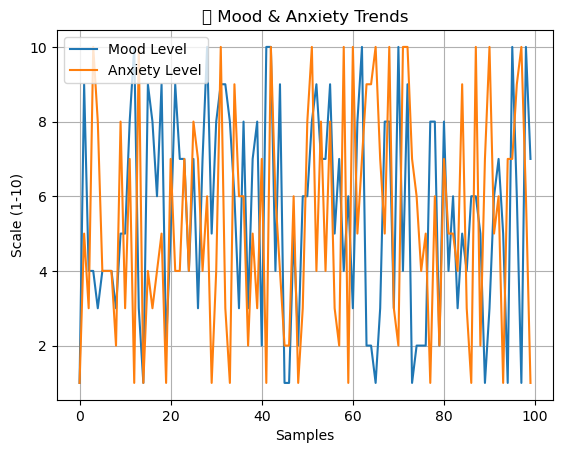

In [9]:
plt.plot(df['Mood_Level_Scale_1_10'], label="Mood Level")
plt.plot(df['Anxiety_Level_Scale_1_10'], label="Anxiety Level")
plt.title("📈 Mood & Anxiety Trends")
plt.xlabel("Samples")
plt.ylabel("Scale (1-10)")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
def custom_dashboard(user_df, score):
    print("\n📊 Stress Dashboard")
    print(f"Stress Score: {score} " + "█" * (score // 10))
    print("Mood Level (1-10):", user_df.iloc[0]['Mood_Level_Scale_1_10'])
    print("Anxiety Level (1-10):", user_df.iloc[0]['Anxiety_Level_Scale_1_10'])

custom_dashboard(user_df, score)


📊 Stress Dashboard
Stress Score: 30 ███
Mood Level (1-10): 5.0
Anxiety Level (1-10): 53.0


c:\Users\J Shivani reddy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


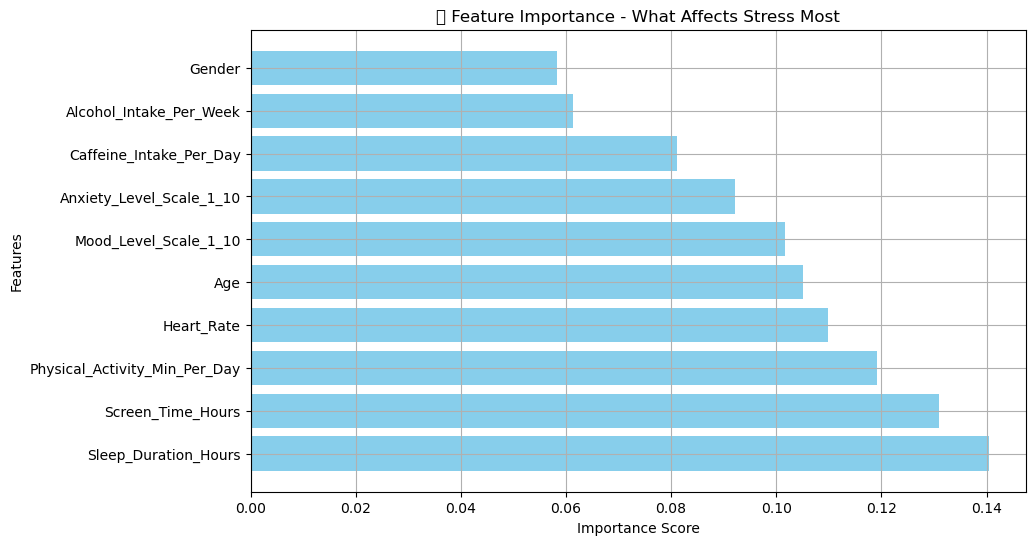

In [11]:
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_imp.index, feat_imp.values, color="skyblue")
plt.title("🔍 Feature Importance - What Affects Stress Most")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()

In [12]:
log_data = user_data.copy()
log_data["Stress_Score"] = score
log_data["Risk_Flag"] = flag
log_df = pd.DataFrame([log_data])

try:
    existing_log = pd.read_csv("stress_log.csv")
    updated_log = pd.concat([existing_log, log_df], ignore_index=True)
except FileNotFoundError:
    updated_log = log_df

updated_log.to_csv("stress_log.csv", index=False)
print("📁 Your input was saved to stress_log.csv")


📁 Your input was saved to stress_log.csv


In [13]:
with open("stress_report.txt", "w") as f:
    f.write("🧠 Mental Health Stress Report\n")
    f.write("="*40 + "\n")
    f.write(f"Age: {user_data['Age']}\n")
    f.write(f"Gender: {user_data['Gender']}\n")
    f.write(f"Heart Rate: {user_data['Heart_Rate']} bpm\n")
    f.write(f"Sleep Duration: {user_data['Sleep_Duration_Hours']} hrs\n")
    f.write(f"Physical Activity: {user_data['Physical_Activity_Min_Per_Day']} min/day\n")
    f.write(f"Screen Time: {user_data['Screen_Time_Hours']} hrs/day\n")
    f.write(f"Caffeine Intake: {user_data['Caffeine_Intake_Per_Day']} drinks/day\n")
    f.write(f"Alcohol Intake: {user_data['Alcohol_Intake_Per_Week']} drinks/week\n")
    f.write(f"Mood Level: {user_data['Mood_Level_Scale_1_10']}/10\n")
    f.write(f"Anxiety Level: {user_data['Anxiety_Level_Scale_1_10']}/10\n\n")
    f.write(f"🧩 Predicted Stress Score: {score}/100\n")
    f.write(f"🚩 Risk Level: {flag}\n")
    f.write(f"📝 Recommendation: {suggestion}\n")
    f.write("="*40 + "\n")
print("📄 stress_report.txt generated.")

📄 stress_report.txt generated.
